# Exploring relationships (correlation) with outliers (0 values and extreme outliers)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/6. Advanced Analytics/Project_Waste in the world'

In [3]:
#Import dataframes

df_all = pd.read_csv(os.path.join(path,'Prepared data','Complete_Dataset.csv'), index_col = False)


In [4]:
df_all.head()

,Unnamed: 0,Country,Year,Type of emissions,Gas type,"Emissions quantity, tonnes","Total population, mln",Population density,GDP per capita,WMG
0,0,Aruba,2017,solid-waste-disposal,ch4,487.0,105.0,585.769,29329.0,NaN
1,1,Aruba,2017,solid-waste-disposal,co2e_100yr,13636.0,105.0,585.769,29329.0,NaN
2,2,Aruba,2017,solid-waste-disposal,co2e_20yr,40908.0,105.0,585.769,29329.0,NaN
3,3,Aruba,2018,solid-waste-disposal,co2e_20yr,41244.0,105.0,588.675,30220.0,NaN
4,4,Afganistan,2015,solid-waste-disposal,ch4,21000.0,NaN,NaN,NaN,NaN


In [5]:
df_all.corr()

/var/folders/qt/rvr2fn4d76j_4yg25rnyl2000000gn/T/ipykernel_8114/738805462.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_all.corr()


,Unnamed: 0,Year,"Emissions quantity, tonnes","Total population, mln",Population density,GDP per capita,WMG
Unnamed: 0,1.000000,0.127013,0.044517,0.039308,-0.048642,-0.053641,0.039119
Year,0.127013,1.000000,0.002085,0.005090,0.003416,0.025076,-0.025805
"Emissions quantity, tonnes",0.044517,0.002085,1.000000,0.358389,-0.021466,0.021254,0.062241
"Total population, mln",0.039308,0.005090,0.358389,1.000000,-0.025408,-0.061205,-0.019108
Population density,-0.048642,0.003416,-0.021466,-0.025408,1.000000,0.473944,0.150948
GDP per capita,-0.053641,0.025076,0.021254,-0.061205,0.473944,1.000000,0.638240
WMG,0.039119,-0.025805,0.062241,-0.019108,0.150948,0.638240,1.000000


In [6]:
df_all['Year'] = df_all['Year'].astype('str')

In [7]:
df_all.corr()

/var/folders/qt/rvr2fn4d76j_4yg25rnyl2000000gn/T/ipykernel_8114/738805462.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_all.corr()


,Unnamed: 0,"Emissions quantity, tonnes","Total population, mln",Population density,GDP per capita,WMG
Unnamed: 0,1.000000,0.044517,0.039308,-0.048642,-0.053641,0.039119
"Emissions quantity, tonnes",0.044517,1.000000,0.358389,-0.021466,0.021254,0.062241
"Total population, mln",0.039308,0.358389,1.000000,-0.025408,-0.061205,-0.019108
Population density,-0.048642,-0.021466,-0.025408,1.000000,0.473944,0.150948
GDP per capita,-0.053641,0.021254,-0.061205,0.473944,1.000000,0.638240
WMG,0.039119,0.062241,-0.019108,0.150948,0.638240,1.000000


# Wrangling

In [8]:
#Dropping columns

df_all = df_all.drop(columns=['Unnamed: 0'])


In [9]:
#Renaming column 'Total emissions'

df_all.rename (columns = {'Total population, mln': 'Total population, thousands'}, inplace = True)

# Exploring relationships

## Correlation heatmaps

/var/folders/qt/rvr2fn4d76j_4yg25rnyl2000000gn/T/ipykernel_8114/3721441540.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_all.corr())


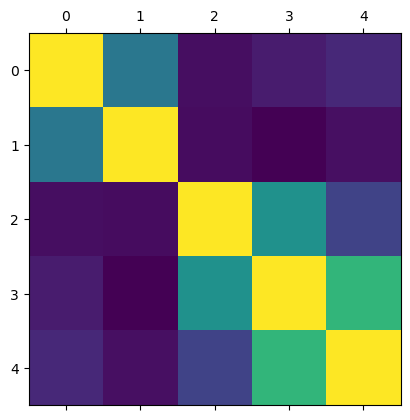

In [10]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_all.corr())
plt.show()

/var/folders/qt/rvr2fn4d76j_4yg25rnyl2000000gn/T/ipykernel_8114/529996413.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_all.corr(), fignum=f.number) # type of plot


Text(0.5, 1.0, 'Correlation Matrix')

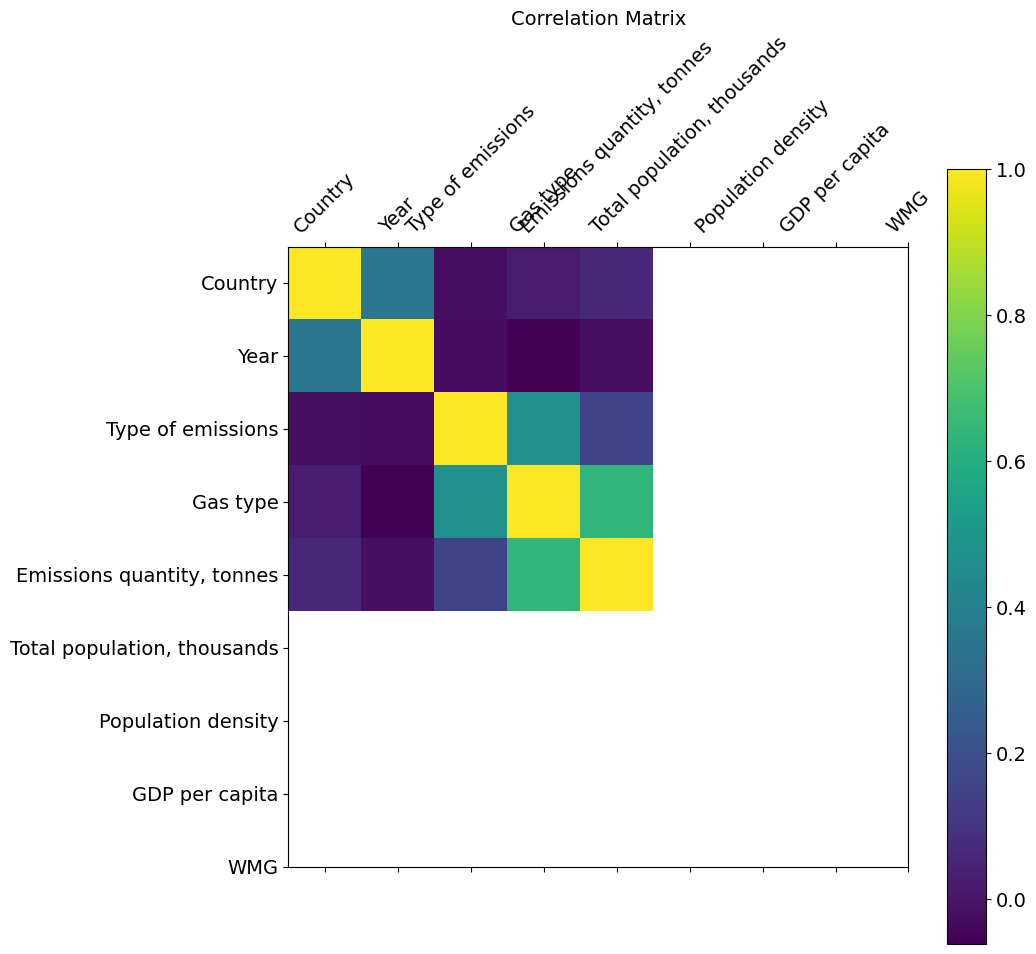

In [11]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_all.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_all.shape[1]), df_all.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_all.shape[1]), df_all.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## Correlation map using seaborn

In [12]:
df_all.columns

Index(['Country', 'Year', 'Type of emissions', 'Gas type',
       'Emissions quantity, tonnes', 'Total population, thousands',
       'Population density', 'GDP per capita', 'WMG'],
      dtype='object')

In [13]:
# Create a subset excluding the "Country", "Year", 'Type of emissions', 'Gas type' columns

sub = df_all[['Emissions quantity, tonnes', 'Total population, thousands', 'Population density', 'GDP per capita', 'WMG']]

In [14]:
sub

,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG
0,487.0,105.0,585.769,29329.0,NaN
1,13636.0,105.0,585.769,29329.0,NaN
2,40908.0,105.0,585.769,29329.0,NaN
3,41244.0,105.0,588.675,30220.0,NaN
4,21000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8780,7934724.0,66064.0,272.162,40617.0,NaN
8781,23804172.0,66064.0,272.162,40617.0,NaN
8782,940047.0,1338636.0,450.236,1711.0,NaN
8783,78963948.0,1338636.0,450.236,1711.0,NaN


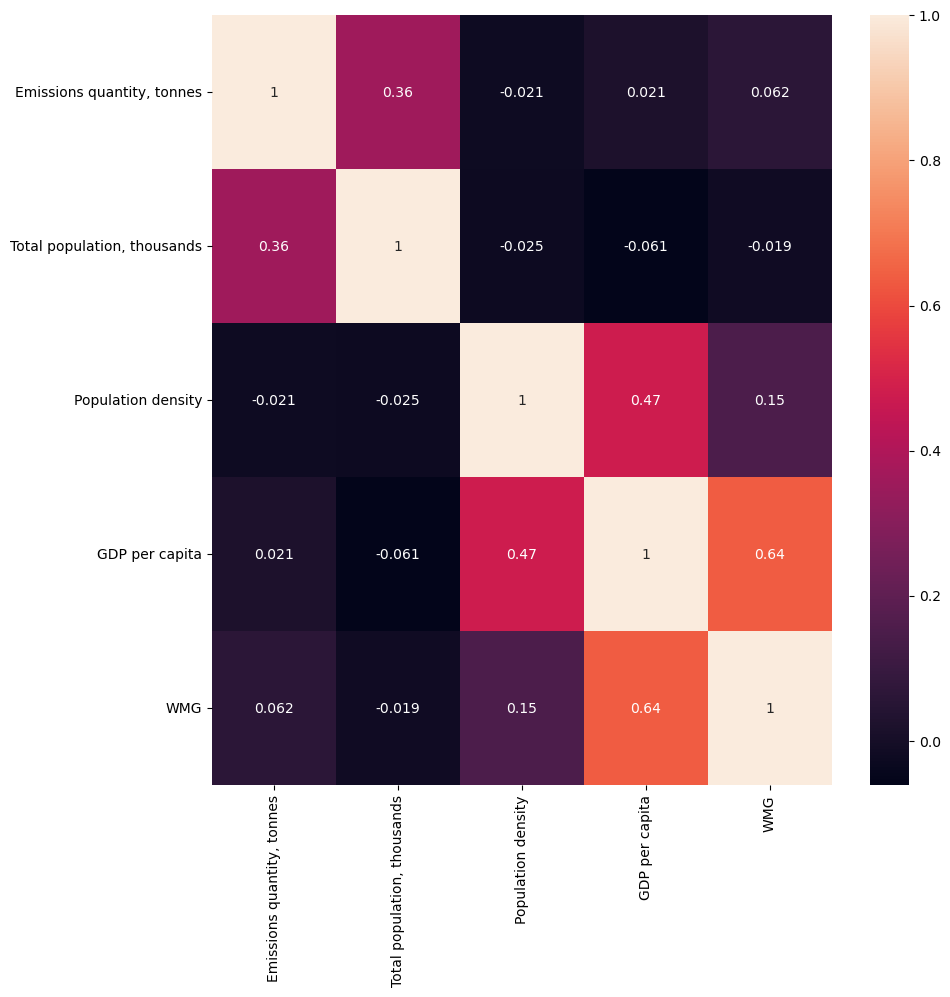

In [15]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

**In this seaborn matrix, I can see that there is not a lot of correlation going on here. However, there is a moderate positive correlation between Emissions quantity and Total population, as well as between Population density and GDP per capita. There is a strong positive correlation between GDP per capita and WMG index, which assumes that countries with higher GDP per capita invest more into and are more successful at waste management. There is a very weak negative correlation between Total population and GDP per capita, which means that as population grows, the GDP gets lower and vice versa. Unfortunately, I cannot say that there is a relationship between Emissions and WMG index, and emissions and GDP per capita, which would be relevant for my hypotheses**

## Scatterplot

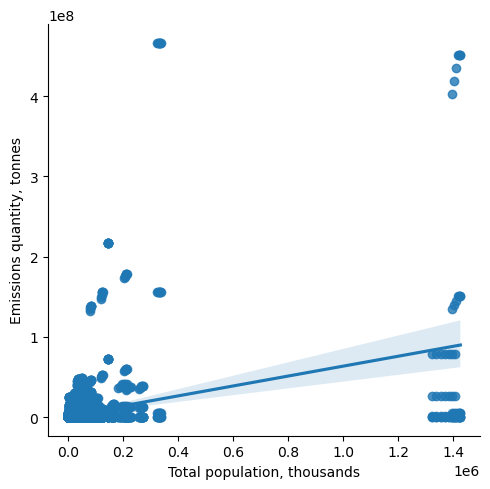

In [16]:
#Emissions quantity & Total population
sns.lmplot(x = 'Total population, thousands', y = 'Emissions quantity, tonnes', data = df_all)

**There is an upward positive trend in this scatterplot. Most of the data points are concentrated in the left lower corner more or less close to the line. There are a few outliers of both variables, which do not correlate.**

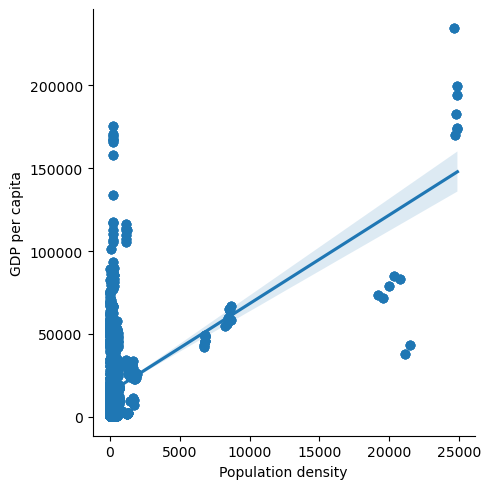

In [17]:
#Population density & GDP per capita
sns.lmplot(x = 'Population density', y = 'GDP per capita', data = df_all)

**There is an even more steep upward trend here. However, the data values seem to be concentrated in the left lower corner again.**

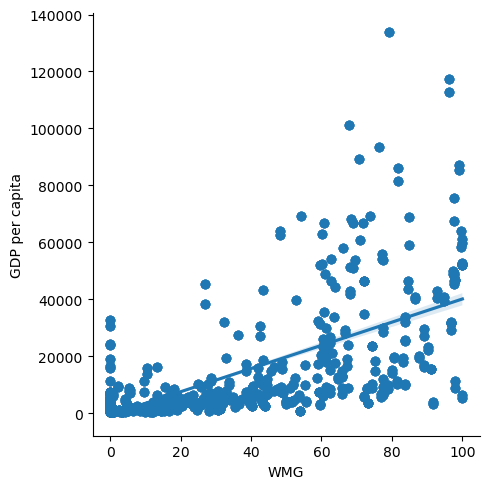

In [18]:
#WMG & GDP per capita
sns.lmplot(x = 'WMG', y = 'GDP per capita', data = df_all)

**There is a strong positive correlation between GDP per capita and WMG index. In general, the higher the GDP, the higher the WMG index.** 

## Pair plots


In [19]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Emissions quantity, tonnes', 'Total population, thousands', 'Population density', 'GDP per capita', 'WMG']]

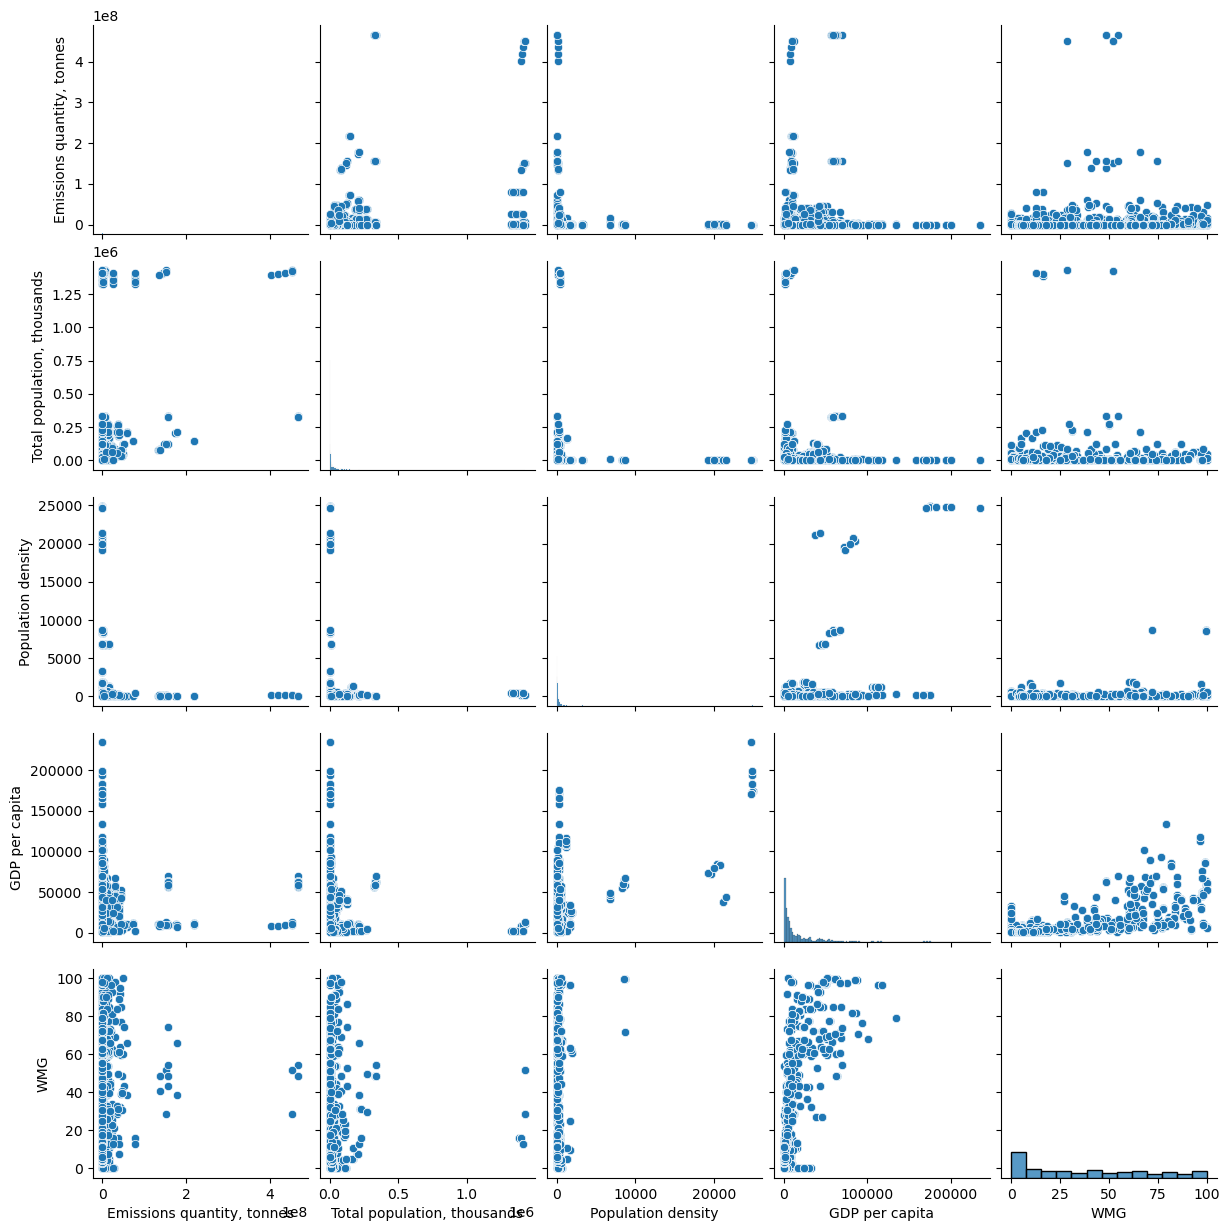

In [20]:
# Create a pair plot 

g = sns.pairplot(sub_2)

**The scatterplots don't look very much promising, except for those ones discussed above** 

## Categorical plots

<Axes: xlabel='Emissions quantity, tonnes', ylabel='Count'>

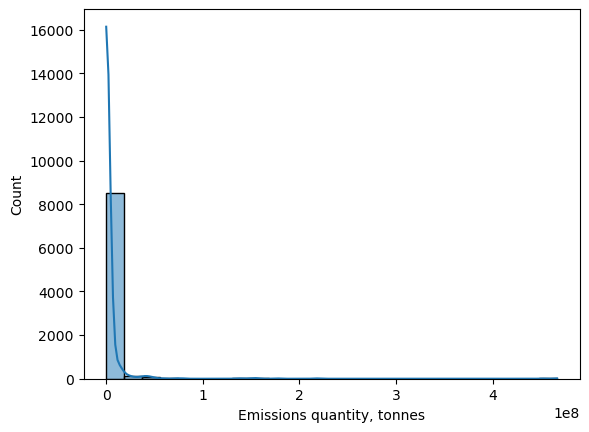

In [21]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Emissions quantity, tonnes'], bins = 25, kde = True)

In [22]:
#Grouping emissions quantity (all types together) by year and country, creating a new column for the grouping results
df_all['Emissions by year & country'] = df_all.groupby(['Country', 'Year'])['Emissions quantity, tonnes'].transform(np.sum)


In [23]:
df_all.head()

,Country,Year,Type of emissions,Gas type,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country
0,Aruba,2017,solid-waste-disposal,ch4,487.0,105.0,585.769,29329.0,NaN,55031.0
1,Aruba,2017,solid-waste-disposal,co2e_100yr,13636.0,105.0,585.769,29329.0,NaN,55031.0
2,Aruba,2017,solid-waste-disposal,co2e_20yr,40908.0,105.0,585.769,29329.0,NaN,55031.0
3,Aruba,2018,solid-waste-disposal,co2e_20yr,41244.0,105.0,588.675,30220.0,NaN,55483.0
4,Afganistan,2015,solid-waste-disposal,ch4,21000.0,NaN,NaN,NaN,NaN,2373000.0


<Axes: xlabel='Emissions by year & country', ylabel='Count'>

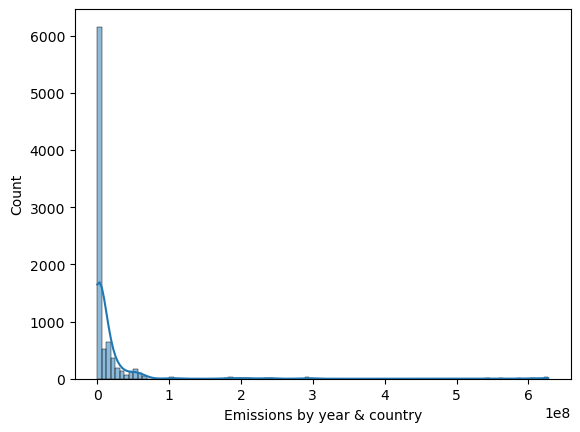

In [24]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['Emissions by year & country'], bins = 100, kde = True)

In [25]:
df_all['Emissions by year & country'].value_counts()

0.0           1225
18306000.0      50
1175200.0       50
1559400.0       50
14803000.0      50
              ... 
23165000.0       5
54579.0          5
2892800.0        5
711900.0         5
25651000.0       5
Name: Emissions by year & country, Length: 639, dtype: int64

In [26]:
df_all.loc[df_all['Emissions by year & country'] == 0.0, 'Country category by emissions'] = 'No emissions country'

In [27]:
df_all.loc[(df_all['Emissions by year & country'] > 0.0) & (df_all['Emissions by year & country'] < 30000.0), 'Country category by emissions'] = 'Insignificant emissions country'


In [28]:
df_all.loc[(df_all['Emissions by year & country'] >= 30000.0) & (df_all['Emissions by year & country'] < 200000.0), 'Country category by emissions'] = 'Low emissions country'


In [29]:
df_all.loc[(df_all['Emissions by year & country'] >= 200000.0) & (df_all['Emissions by year & country'] < 1000000.0), 'Country category by emissions'] = 'Moderate emissions country'


In [30]:
df_all.loc[(df_all['Emissions by year & country'] >= 1000000.0) & (df_all['Emissions by year & country'] < 5000000.0), 'Country category by emissions'] = 'Above-Moderate emissions country'


In [31]:
df_all.loc[(df_all['Emissions by year & country'] >= 5000000.0) & (df_all['Emissions by year & country'] < 50000000.0), 'Country category by emissions'] = 'High emissions country'


In [32]:
df_all.loc[(df_all['Emissions by year & country'] >= 50000000.0) & (df_all['Emissions by year & country'] < 100000000.0), 'Country category by emissions'] = 'Extreme emissions country'


In [33]:
df_all.loc[df_all['Emissions by year & country'] > 100000000.0, 'Country category by emissions'] = 'Critically radical emissions country'


In [34]:
df_all['Country category by emissions'].value_counts(dropna = False)

Above-Moderate emissions country        2240
High emissions country                  2220
No emissions country                    1225
Moderate emissions country              1150
Low emissions country                    985
Insignificant emissions country          385
Extreme emissions country                335
Critically radical emissions country     245
Name: Country category by emissions, dtype: int64

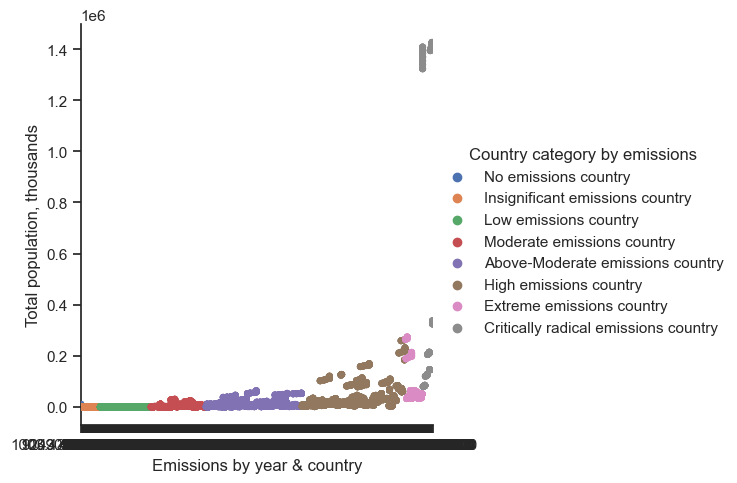

In [35]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Emissions by year & country", y="Total population, thousands", hue="Country category by emissions", data=df_all)

**It can be seen that high emissions, extreme emissions and critically radical emissions countries tend to have more total population**

<Axes: xlabel='GDP per capita', ylabel='Count'>

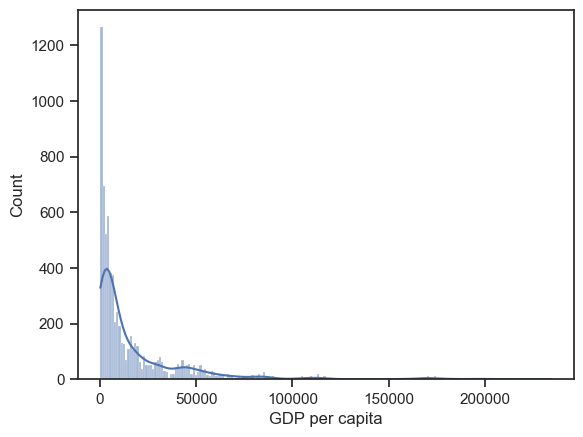

In [36]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_all['GDP per capita'], bins = 200, kde = True)

In [37]:
df_all.loc[df_all['GDP per capita'] < 1100.0, 'GDP per cap. category'] = 'Low GDP per cap.'

In [38]:
df_all.loc[(df_all['GDP per capita'] >= 1100.0) & (df_all['GDP per capita'] < 5000.0), 'GDP per cap. category'] = 'Low-middle GDP per cap.'


In [39]:
df_all.loc[(df_all['GDP per capita'] >= 5000.0) & (df_all['GDP per capita'] < 10000.0), 'GDP per cap. category'] = 'Middle GDP per cap.'


In [40]:
df_all.loc[(df_all['GDP per capita'] >= 10000.0) & (df_all['GDP per capita'] < 20000.0), 'GDP per cap. category'] = 'Upper-Middle GDP per cap.'


In [41]:
df_all.loc[(df_all['GDP per capita'] >= 20000.0) & (df_all['GDP per capita'] < 50000.0), 'GDP per cap. category'] = 'High GDP per cap.'


In [42]:
df_all.loc[df_all['GDP per capita'] > 50000.0, 'GDP per cap. category'] = 'Extremely high GDP per cap.'

In [43]:
df_all['GDP per cap. category'].value_counts(dropna = False)

Low-middle GDP per cap.        2110
NaN                            1575
Middle GDP per cap.            1265
High GDP per cap.              1190
Upper-Middle GDP per cap.      1035
Low GDP per cap.                970
Extremely high GDP per cap.     640
Name: GDP per cap. category, dtype: int64

In [44]:
df_all.head()

,Country,Year,Type of emissions,Gas type,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country,Country category by emissions,GDP per cap. category
0,Aruba,2017,solid-waste-disposal,ch4,487.0,105.0,585.769,29329.0,NaN,55031.0,Low emissions country,High GDP per cap.
1,Aruba,2017,solid-waste-disposal,co2e_100yr,13636.0,105.0,585.769,29329.0,NaN,55031.0,Low emissions country,High GDP per cap.
2,Aruba,2017,solid-waste-disposal,co2e_20yr,40908.0,105.0,585.769,29329.0,NaN,55031.0,Low emissions country,High GDP per cap.
3,Aruba,2018,solid-waste-disposal,co2e_20yr,41244.0,105.0,588.675,30220.0,NaN,55483.0,Low emissions country,High GDP per cap.
4,Afganistan,2015,solid-waste-disposal,ch4,21000.0,NaN,NaN,NaN,NaN,2373000.0,Above-Moderate emissions country,NaN


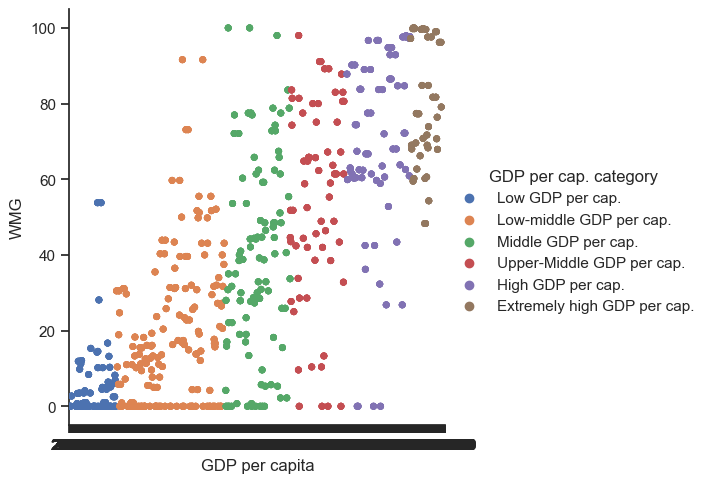

In [45]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g_1 = sns.catplot(x="GDP per capita", y="WMG", hue="GDP per cap. category", data=df_all)

**Here it can be seen that starting with Upper-Middle GDP per cap. the WMG index significantly rises** 